Matias Medrano Ascencio

Daniela Serrano Barba

María Fernanda Tirado Zamudio

Jueves 21 de septiembre del 2023

# Planta de tratamiento de aguas residuales de bajo costo

## Objetivos

### Objetivos generales

- Utilizar optimización para minimizar el costo del tratamiento de aguas residuales en cuatro plantas de tratamiento, tomando en cuenta la carga de los ríos y producción de contaminantes por ciudad junto a los ríos.

- Cumplir con los requerimientos de calidad de agua establecidos por el problema.

### Objetivos específicos

- Plantear el problema e identificar sus componentes, así como el criterio de optimización.
- Identificar las variables sobre las que se tiene control.
- Identificar y plantear todas las restricciones, sustituyendo los parámetros dados por el problema y despejar.
- Formar el vector de costo, matriz de restricciones y vector de soluciones.
- Escribir el código para resolver el problema con ayuda de linprog.
- Analizar los resultados obtenidos.

## Planteamiento del problema

Los vertidos de aguas residuales de las grandes ciudades suelen ser una de las principales causas de la contaminación en los ríos. La siguiente figura ilustra el tipo de sistema que un ingeniero ambiental podría confrontar, donde varias ciudades están ubicadas a orillas de un río y su afluente. 

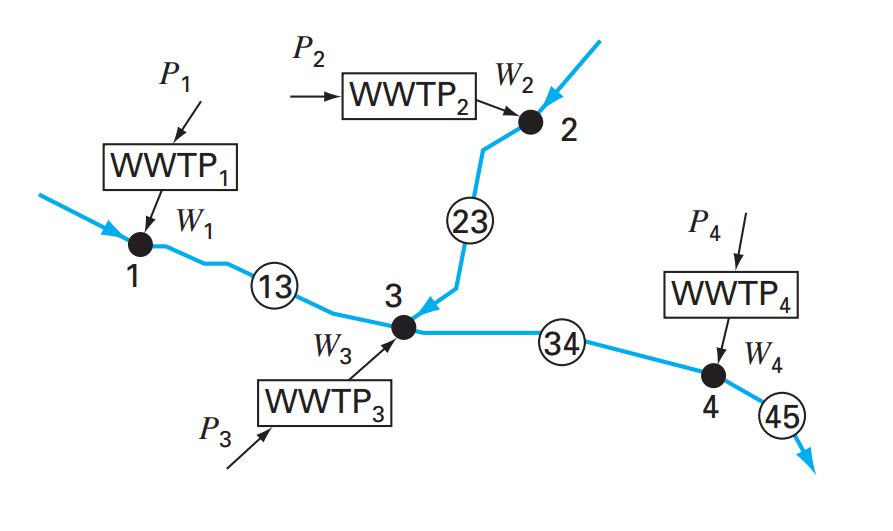

Cada ciudad genera contaminación a una tasa de carga **P** que tiene unidades de miligramos por día (mg/d). La carga contaminante de cada ciudad es sometida a un tratamiento de residuos que da lugar a una fraccion de tratamiento **x** . Así, la cantidad vertida al río es el exceso no eliminado mediante el tratamiento:

$$ W_i = (1-x_i)P_i $$

donde $ W_i $ es la descarga de residuo de cada ciudad.

Cuando el vertido de residuos ingresa al río, se mezcla con la contaminación procedente de aguas arriba. Si se supone una mezcla completa en el punto de descarga, la concentración resultante en el punto de descarga se puede calcular mediante un simple balance de masa:

$$ c_i = \frac{W_i + Q_u c_u}{Q_i} $$

donde $ Q_u $ es igual al flujo (L/d), $ c_u $ es la concentración (mg/L) del río aguas arriba de la descarga, y $ Q_i $ es el flujo (L/d) aguas abajo de la descarga.

Una vez establecida la concentración en el punto de mezcla, ocurren procesos químicos y biológicos que pueden eliminar parte de la contaminación a medida que fluye río abajo. Para el presente caso, asumiremos que esta eliminación puede representarse mediante un factor de reducción fraccional simple **R**, que depende de cada segmento.

Suponiendo que las cabeceras (es decir, el río sobre las ciudades 1 y 2) están libres de contaminación, las concentraciones en los cuatro nodos se pueden calcular de la siguiente manera:

$$ c_1 = \frac{(1-x_1)P_1}{Q_{13}} $$

$$ c_2 = \frac{(1-x_2)P_2}{Q_{23}} $$

$$ c_3 = \frac{R_{13}Q_{13}c_1 + R_{23}Q_{23}c_2 + (1-x_3)P_3}{Q_{34}} $$

$$ c_1 = \frac{R_{34}Q_{34}c_3 + (1-x_4)P_4}{Q_{45}} $$

A continuación, se reconoce que el tratamiento de residuos cuesta una cantidad diferente, $ d_i $ ($1000/mg
retirados), en cada una de las instalaciones. Por tanto, el coste total del tratamiento (diario) puede
calcularse como:

$$ Z = d_1P_1x_1 + d_2P_2x_2 + d_3P_3x_3 + d_4P_4x_4 $$

donde $ Z $ es el coste diario de tratamiento ($1000/mg).

La última pieza del “rompecabezas” tiene que ver con las regulaciones ambientales. Para proteger los usos benéficos del río (por ejemplo, paseos en bote, pesca, baño), se deben establecer regulaciones que dictan que la concentración del río no debe exceder un estándar de calidad del agua de $ c_s $.

Los parámetros de producción de desechos, costo de tratamiento por planta, carga de los segmentos de los ríos, factor de reducción y reglamentos ambientales para el sistema de tratamiento de aguas se resumen en la siguiente tabla:

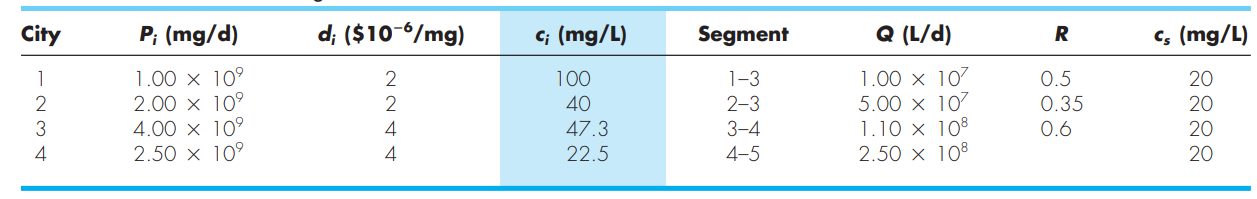

La columna sombreada representa la concentración en cada nodo en caso de no realizar ningún tratamiento de aguas. Nótese como ninguno está por debajo de los estándares aceptados.

**Utilizando programación lineal determine los niveles de tratamiento de aguas en cada planta que cumpla con los estándares ambientales de calidad de agua y que minimize el costo.**

## Solución

Primero definimos nuestro criterio de optimización, en este caso buscamos *minimizar* los costos.

### Variables sobre las que tenemos control

- $ x_1 $ porcentaje de tratamiento en la planta de tratamiento 1
- $ x_2 $ porcentaje de tratamiento en la planta de tratamiento 2
- $ x_3 $ porcentaje de tratamiento en la planta de tratamiento 3
- $ x_4 $ porcentaje de tratamiento en la planta de tratamiento 4

### Función de costo (a minimizar)

$$ Z = d_1P_1x_1 + d_2P_2x_2 + d_3P_3x_3 + d_4P_4x_4 $$

Sustituimos los valores de $d_i $ y $ P_i $ dados en la tabla, tomando en cuenta que los valores de $d_i$ están dados en dólares multiplicados por $ 10^{-6} $ y los valores de $ P_i $ están dados multiplicados por $10^9 $. Obtenemos la siguiente función dada en dólares:

$$ Z = 2000x_1 + 4000x_2 + 16000x_3 + 10000x_4 $$

### Restricciones

Sustituimos los valores de $P_i $, $Q_i$, $c_i$ y $R_i$ para obtener las siguientes restricciones:

- $ 100(1-x_1) \leq 20 $

- $ 40(1-x_2) \leq 20 $

- $ \frac{520}{11} - \frac{50}{11}x_1 - \frac{70}{11}x_2 - \frac{400}{11}x_3 \leq 20 $

- $ \frac{562}{25} - \frac{6}{5}x_1 - \frac{42}{25}x_2 - \frac{48}{5}x_3  - 10x_4 \leq 20 $

Despejamos, asegurandonos de mantener desigualdades de tipo menor o igual que:

- $ -x_1 \leq -\frac{4}{5} $
- $ -x_2 \leq -\frac{1}{2} $
- $ -\frac{50}{11}x_1 - \frac{70}{11}x_2 - \frac{400}{11}x_3 \leq -\frac{300}{11} $
- $ -\frac{6}{5}x_1 - \frac{42}{25}x_2 - \frac{48}{5}x_3 - 10x_4 \leq -\frac{62}{25} $

Igualmente, como los valores de **x** son porcentajes, deben de estar entre el 0 y el 1.

$$ 0 \leq x_1,x_2, x_3,x_4 \leq 1 $$

Lo cual podemos reescribir de la siguiente manera para mantener todo en desigualdades de menor o igual que:

- $ x_1 \leq 1 $
- $ x_2 \leq 1 $
- $ x_2 \leq 1 $
- $ x_3 \leq 1 $
- $ -x_1 \leq 0 $
- $ -x_2 \leq 0 $
- $ -x_2 \leq 0 $
- $ -x_3 \leq 0 $

### Código

Para realizar el código que optimize el sistema de aguas residuales requerimos:
- un vector con los coeficientes de las variables en la ecuación de costos
- una matriz con los coeficientes de las variables en las restricciones de menor o igual que
- un vector con los resultados de las restricciones de menor o igual que

Es decir, para el primer vector (c) colocamos los coeficentes bajo el apartado de función de costo, en orden de las variables ($x_1$, $x_2$, $x_3$, $x_4$).

Para la matriz de restricciones (Aub) tomamos los coeficientes de las cuatro variables en orden, en las ecuaciones de restricciones ya despejadas (solamente x del lado izquierdo). Esto significa las 4 ecuaciones de restricciones de normativas de calidad de agua, y las 8 restricciones que garantizan que nuestros valores de **x** se encuentren entre el 0 y el 1.

Finalmente formamos el vector de respuestas (bub), tomando las soluciones de las 12 desigualdades que utilizamos.

In [4]:
import numpy as np
import scipy.optimize as opt

c = np.array([2000,
             4000,
             16000,
             10000,
            ])

Aub = np.array([
    [-1, 0, 0, 0],
    [0, -1, 0, 0],
    [-50/11, -70/11, -400/11, 0],
    [-6/5, -42/25, -48/5, -10],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, -1]
])
bub = np.array([-4/5,
                -1/2,
               -300/11,
                -62/25,
                1,
                1,
                1,
                1,
                0,
                0,
                0,
                0
               ])

opt.linprog(c, Aub, bub)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 12600.0
              x: [ 1.000e+00  5.000e-01  5.375e-01  0.000e+00]
            nit: 0
          lower:  residual: [ 1.000e+00  5.000e-01  5.375e-01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  1.000e+04]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 2.000e-01  0.000e+00  0.000e+00  4.720e+00
                              0.000e+00  5.000e-01  4.625e-01  1.000e+00
                              1.000e+00  5.000e-01  5.375e-01  0.000e+00]
                 marginals: [-0.000e+00 -1.200e+03 -4.400e+02 -0.000e+00
                             -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00
                             -0.000e+00 -0.000e

Obtenemos los valores de nuestras cuatro variables:
- $ x_1 = 1 $
- $ x_2 = 0.5 $
- $ x_3 = 0.5375 $
- $ x_4 = 0 $

Igualmente obtenemos el resultado de la función de costo.

Z = $12,600

## Visualización de la solución del problema

Podemos confirmar que se cumplen las restricciones al sustituir los valores de las variables en las ecuaciones de concentraciones $c_i$ y confirmar que todos los datos son menores o iguales a 20, tal y como se planetaba en la normativa de calidad de agua.

- $ 100(1-1) = 0 $

- $ 40(1-0.5) = 20 $

- $ \frac{520}{11} - \frac{50}{11}(1) - \frac{70}{11}(0.5) - \frac{400}{11}(0.5375) = 20 $

- $ \frac{562}{25} - \frac{6}{5}(1) - \frac{42}{25}(0.5) - \frac{48}{5}(0.5375) - 10(0) = 15.28 $

Igualmente, todas las variables son mayores a 0 y menores a 1.

## Conclusiones

Los valores de las variables (en este caso, porcentajes de tratamiento de agua residual por planta) cumplen con las restricciones formadas por el problema y garantizan el costo mínimo de este. Es decir, cumplen con las restricciones de las normativas ambientales de calidad de agua de un máximo de 20 mg/L, y permiten el menor costo por el tratamiento del agua. Para poder optimizar de manera correcta fue importante tomar en cuenta todos los datos del problema, como el costo de tratamiento por cada mg en cada planta, la carga de cada segmento de río y el factor de reducción de contaminación, los cuales son datos que pueden cambiar para alterar los resultados obtenidos. 

Es importante remarcar que los datos obtenidos en el ejercicio son diferentes a los datos de la solución del libro de donde se obtuvo el problema. Aunque se cuentan con los mismos parámetros, los resultados de $x_1$ y $x_3$ cambian a 0.8 y 0.5625 respectivamente. De todas formas, el resultado de la función de costo es exactamente el mismo (12600), lo que significa que en este caso existen dos soluciones diferentes que cumplen con todas las restricciones, aunque los datos obtenidos en este ejercicio reducen la concentración en el nodo 1 a un valor de 0 mg/L.

## Referencias

Canale, R. P. (2015). Numerical Methods for Engineers. McGraw Hill Education. 

     https://mmsallaboutmetallurgy.com/wp-content/uploads/2019/01/numerical-methods.pdf